In [1]:
import yfinance as yf
import pandas as pd
from datetime import date, timedelta

In [2]:
# time period
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today()-timedelta(days = 365)).strftime("%Y-%m-%d")
start_date,end_date

('2023-08-24', '2024-08-23')

In [3]:
# list of stocks tickers
tickers = ['RELIANCE.NS','TCS.NS','INFY.NS','HDFCBANK.NS']
data = yf.download(tickers,start = start_date,end = end_date,progress = False)

In [4]:
print(data.shape)
data.head(1)

(243, 24)


Price         Adj Close                                               Close  \
Ticker      HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS   
Date                                                                          
2023-08-24  1558.024536  1397.532471  2471.412109  3331.414551  1579.300049   

Price                                                 High               ...  \
Ticker          INFY.NS  RELIANCE.NS   TCS.NS  HDFCBANK.NS      INFY.NS  ...   
Date                                                                     ...   
2023-08-24  1423.599976  2479.800049  3387.75  1596.199951  1425.050049  ...   

Price              Low                      Open                               \
Ticker     RELIANCE.NS       TCS.NS  HDFCBANK.NS INFY.NS  RELIANCE.NS  TCS.NS   
Date                                                                            
2023-08-24      2471.0  3378.100098  1593.300049  1421.5  2539.899902  3408.0   

Price           Volume                                
Ticker     HDFCBANK.NS  INFY.NS RELIANCE.NS   TCS.NS  
Date                                                  
2023-08-24    21572896  5171963     7070010  1152881  

[1 rows x 24 columns]

In [5]:
# reset index
data = data.reset_index()
data.head(2)

Price        Date    Adj Close                                         \
Ticker             HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
0      2023-08-24  1558.024536  1397.532471  2471.412109  3331.414551   
1      2023-08-25  1540.464233  1394.096680  2460.000977  3325.072021   

Price         Close                                                High  ...  \
Ticker  HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS  ...   
0       1579.300049  1423.599976  2479.800049  3387.750000  1596.199951  ...   
1       1561.500000  1420.099976  2468.350098  3381.300049  1577.500000  ...   

Price           Low                      Open                               \
Ticker  RELIANCE.NS       TCS.NS  HDFCBANK.NS INFY.NS  RELIANCE.NS  TCS.NS   
0       2471.000000  3378.100098  1593.300049  1421.5  2539.899902  3408.0   
1       2442.600098  3350.250000  1574.550049  1413.0  2456.000000  3375.0   

Price       Volume                                
Ticker HDFCBANK.NS  INFY.NS RELIANCE.NS   TCS.NS  
0         21572896  5171963     7070010  1152881  
1         15034878  4307172    11111200  1158046  

[2 rows x 25 columns]

In [6]:
# melted dataframes
data_melted = data.melt(id_vars = ['Date'],var_name = ['Attribute','Ticker'])
data_melted.head(2)

,Date,Attribute,Ticker,value
0,2023-08-24,Adj Close,HDFCBANK.NS,1558.024536
1,2023-08-25,Adj Close,HDFCBANK.NS,1540.464233


In [7]:
# pivot the melted dataframe
data_pivoted = data_melted.pivot_table(index=['Date','Ticker'],columns='Attribute',values = 'value',aggfunc='first')
data_pivoted.head(5)

Attribute                 Adj Close        Close         High          Low  \
Date       Ticker                                                            
2023-08-24 HDFCBANK.NS  1558.024536  1579.300049  1596.199951  1576.150024   
           INFY.NS      1397.532471  1423.599976  1425.050049  1414.449951   
           RELIANCE.NS  2471.412109  2479.800049  2539.899902  2471.000000   
           TCS.NS       3331.414551  3387.750000  3413.050049  3378.100098   
2023-08-25 HDFCBANK.NS  1540.464233  1561.500000  1577.500000  1558.400024   

Attribute                      Open      Volume  
Date       Ticker                                
2023-08-24 HDFCBANK.NS  1593.300049  21572896.0  
           INFY.NS      1421.500000   5171963.0  
           RELIANCE.NS  2539.899902   7070010.0  
           TCS.NS       3408.000000   1152881.0  
2023-08-25 HDFCBANK.NS  1574.550049  15034878.0

In [8]:
stock_data=data_pivoted.reset_index()
stock_data.head(5)

Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-08-24,HDFCBANK.NS,1558.024536,1579.300049,1596.199951,1576.150024,1593.300049,21572896.0
1,2023-08-24,INFY.NS,1397.532471,1423.599976,1425.050049,1414.449951,1421.500000,5171963.0
2,2023-08-24,RELIANCE.NS,2471.412109,2479.800049,2539.899902,2471.000000,2539.899902,7070010.0
3,2023-08-24,TCS.NS,3331.414551,3387.750000,3413.050049,3378.100098,3408.000000,1152881.0
4,2023-08-25,HDFCBANK.NS,1540.464233,1561.500000,1577.500000,1558.400024,1574.550049,15034878.0


In [9]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       972 non-null    datetime64[ns]
 1   Ticker     972 non-null    object        
 2   Adj Close  972 non-null    float64       
 3   Close      972 non-null    float64       
 4   High       972 non-null    float64       
 5   Low        972 non-null    float64       
 6   Open       972 non-null    float64       
 7   Volume     972 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 60.9+ KB


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


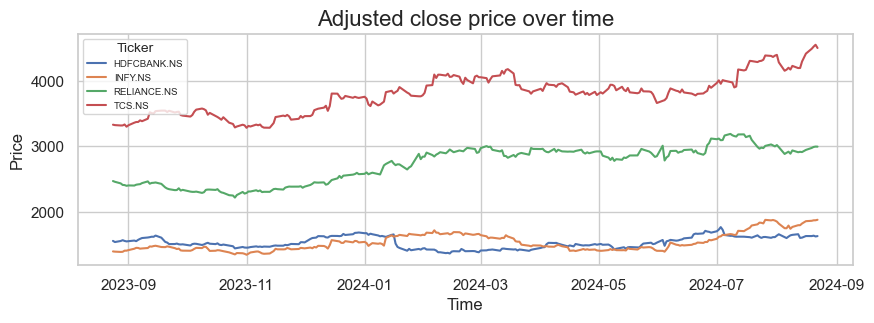

In [11]:
plt.figure(figsize=(10,3))
sns.set(style = 'whitegrid')
sns.lineplot(data = stock_data,x='Date',y='Adj Close',hue='Ticker')
plt.title('Adjusted close price over time',fontsize = 16)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(title='Ticker',title_fontsize = 10,fontsize = 7)
plt.show()

## Now, let’s compute the 50-day and 200-day moving averages and plot these along with the Adjusted Close price for each stock:

In [12]:
short_window = 50
long_window = 200

In [13]:
stock_data.set_index('Date',inplace = True)
unique_tickers = stock_data['Ticker'].unique()

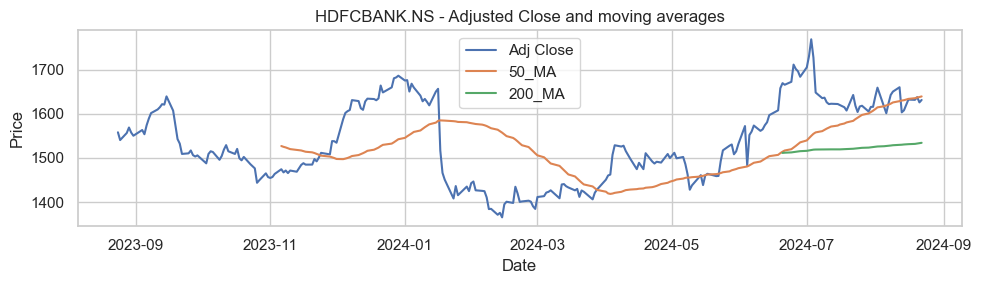

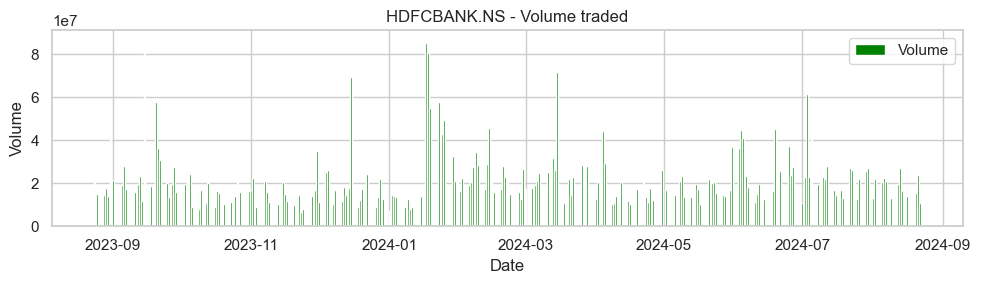

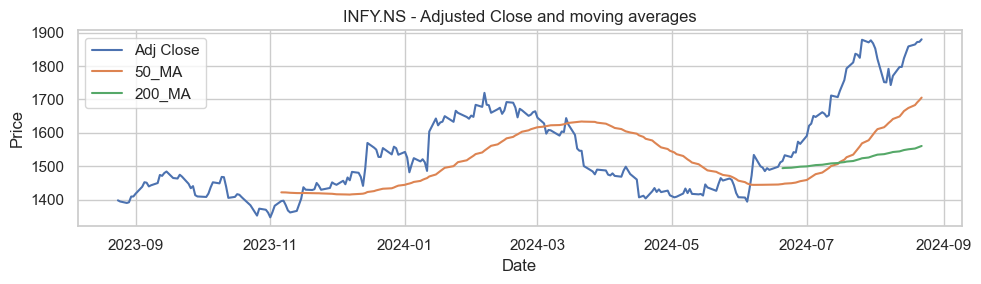

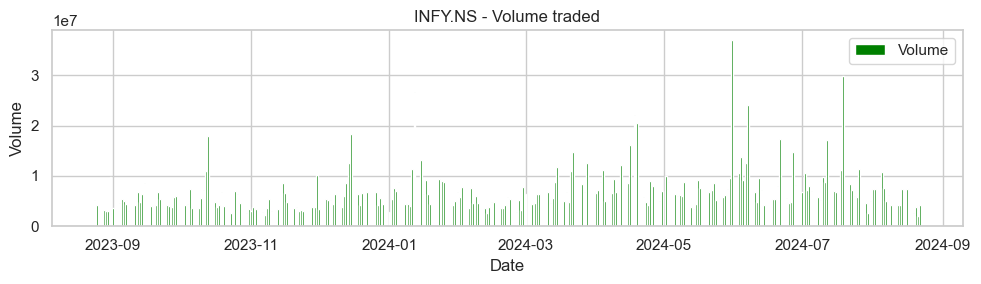

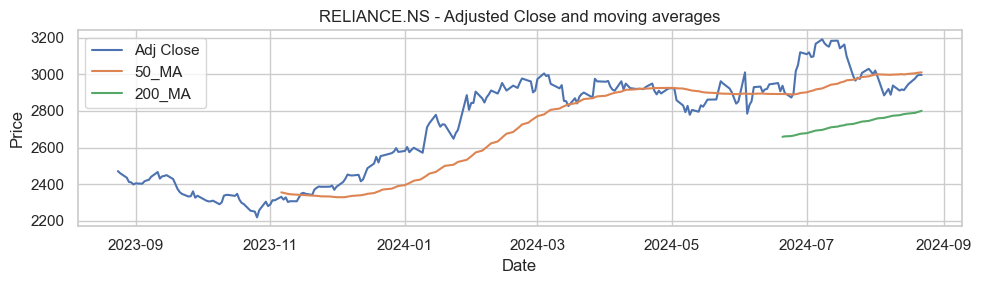

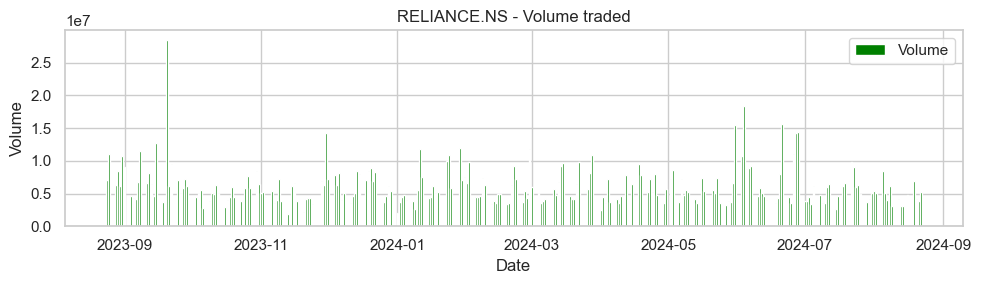

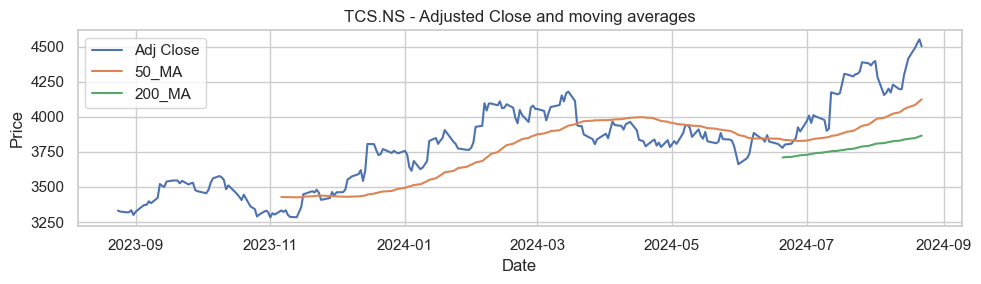

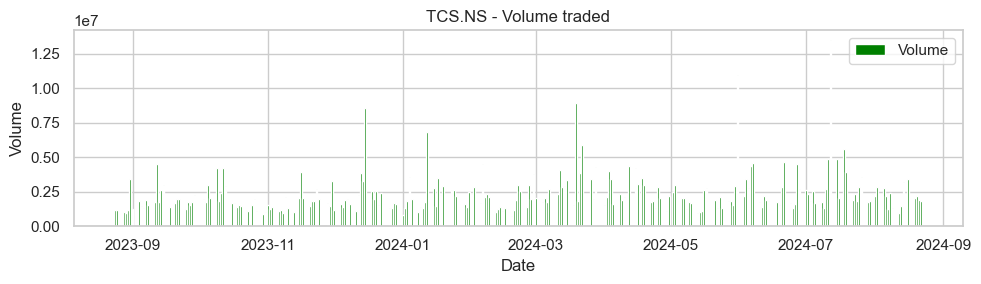

In [14]:
for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker']==ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window = short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()
    
    plt.figure(figsize = (10,3))
    plt.plot(ticker_data.index,ticker_data['Adj Close'],label='Adj Close')
    plt.plot(ticker_data.index,ticker_data['50_MA'],label='50_MA')
    plt.plot(ticker_data.index,ticker_data['200_MA'],label='200_MA')
    plt.title(f'{ticker} - Adjusted Close and moving averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize = (10,3))
    plt.bar(ticker_data.index,ticker_data['Volume'],label='Volume',color = 'green')
    plt.title(f'{ticker} - Volume traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.tight_layout()
    plt.show()
    

Insights : For HDFCBANK and INFY, the prices initially decline but later show signs of recovery, as indicated by the moving averages. RELIANCE and TCS display a more consistent upward trend in their adjusted close prices. The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, particularly noticeable in HDFCBANK and RELIANCE around early 2024.

### Now, let’s have a look at the distribution of daily returns of these stocks:

In [15]:
stock_data['Daily_return']= stock_data.groupby('Ticker')['Adj Close'].pct_change()
stock_data

Attribute,Ticker,Adj Close,Close,High,Low,Open,Volume,Daily_return
Date,,,,,,,,
2023-08-24,HDFCBANK.NS,1558.024536,1579.300049,1596.199951,1576.150024,1593.300049,21572896.0,NaN
2023-08-24,INFY.NS,1397.532471,1423.599976,1425.050049,1414.449951,1421.500000,5171963.0,NaN
2023-08-24,RELIANCE.NS,2471.412109,2479.800049,2539.899902,2471.000000,2539.899902,7070010.0,NaN
2023-08-24,TCS.NS,3331.414551,3387.750000,3413.050049,3378.100098,3408.000000,1152881.0,NaN
2023-08-25,HDFCBANK.NS,1540.464233,1561.500000,1577.500000,1558.400024,1574.550049,15034878.0,-0.011271
...,...,...,...,...,...,...,...,...
2024-08-21,TCS.NS,4551.500000,4551.500000,4560.000000,4492.549805,4518.000000,1896990.0,0.006234
2024-08-22,HDFCBANK.NS,1631.300049,1631.300049,1638.300049,1628.000000,1632.000000,10650319.0,0.003383
2024-08-22,INFY.NS,1880.250000,1880.250000,1893.650024,1869.699951,1884.000000,4300287.0,0.004032


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

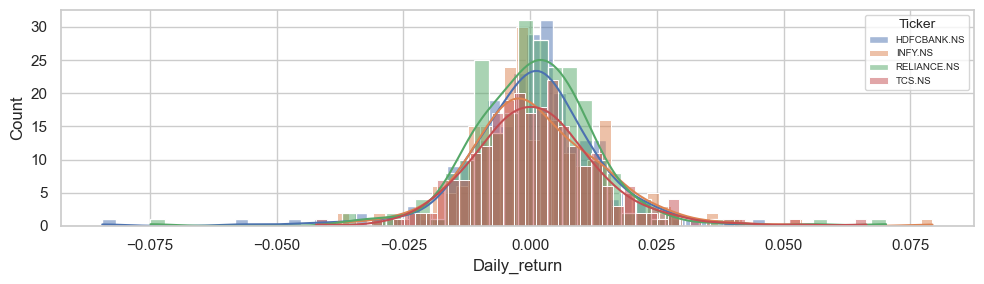

In [16]:
plt.figure(figsize=(10,3))
for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker']==ticker]
    sns.histplot(ticker_data['Daily_return'].dropna(),label=ticker,kde=True,bins =50,alpha=0.5)
    
    
plt.legend(title ='Ticker',fontsize= 7,title_fontsize = 10)  
plt.tight_layout()
plt.show()

Insights :
The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return. However, there are tails on both sides, which reflect occasional significant gains or losses. INFY and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to HDFCBANK and TCS.

### Correlation check

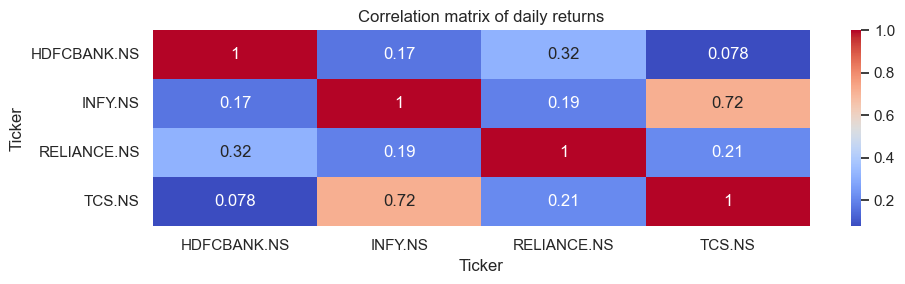

In [17]:
daily_returns= stock_data.pivot_table(index='Date',columns='Ticker',values='Daily_return')
correaltion_matrix=daily_returns.corr()

plt.figure(figsize=(10,3))
sns.heatmap(correaltion_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation matrix of daily returns')
plt.tight_layout()
plt.show()

Insights: INFY and TCS have a high positive correlation (0.71), which indicates that they tend to move in the same direction. HDFCBANK has a moderate positive correlation with RELIANCE (0.37) and a low correlation with INFY (0.17) and TCS (0.10). RELIANCE shows a low correlation with INFY (0.19) and TCS (0.13). These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

## Portfolio optimization

Using Modern Portfolio Theory, we can construct an efficient portfolio by balancing risk and return. We will:
1. Calculate the expected returns and volatility for each stock.
2. Generate a series of random portfolios to identify the efficient frontier.
3. Optimize the portfolio to maximize the Sharpe ratio, which is a measure of risk-adjusted return.


Let’s calculate the expected returns and volatility for each stock:

In [18]:
import numpy as np
expected_returns=daily_returns.mean()*252
volatility=daily_returns.std()*np.sqrt(252)

stock_stats=pd.DataFrame({'Expected Return':expected_returns,'Volatility':volatility})
stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.071781,0.217834
INFY.NS,0.333132,0.220535
RELIANCE.NS,0.223111,0.212648
TCS.NS,0.335014,0.207429


Insights: TCS has the highest expected return (34.31%) and minimum volatility (20.71%), which indicates a potentially high-reward investment with relatively lesser risk.
INFY has the high expected return (34.05%) and higher volatility (22.07%), which indicates a potentially high-reward investment with relatively higher risk.